In [30]:
# Load all packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import edges as e

In [31]:
# Create DataFrame
df = pd.read_excel("../Data/Rit.xlsx", sheet_name="rit_hb")
df.columns = ['Datum', 'UurgroepOmschrijving', 'VertrekHalteCode',
       'VertrekHalteNaam', 'VertrekXCoord', 'VertrekYCoord',
       'AankomstHalteCode', 'AankomstHalteNaam', 'AankomstXCoord',
       'AankomstYCoord', 'AantalRitten']

In [32]:
# Filter DataFrame
# Do not include "Overig" or trips through a stations 
df = df[(df["VertrekHalteNaam"] != "Overig") & (df["AankomstHalteNaam"] != "Overig")]
df = df[df["VertrekHalteNaam"] != df["AankomstHalteNaam"]]

# Remove NaN values
df = df.dropna()

In [33]:
s1 = df['VertrekHalteCode'].tolist()
s2 = df['AankomstHalteCode'].tolist()

stations = set(s1 + s2)

In [34]:
from collections import defaultdict
pos = defaultdict()

vertrekhaltes = df["VertrekHalteCode"].tolist()
vertrekx = df["VertrekXCoord"].tolist()
vertreky = df["VertrekYCoord"].tolist()

for i in range(len(vertrekhaltes)):
    pos[vertrekhaltes[i]] = (vertrekx[i], vertreky[i])
    
aankomsthaltes = df["AankomstHalteCode"].tolist()
aankomstx = df["AankomstXCoord"].tolist()
aankomsty = df["AankomstYCoord"].tolist()

for i in range(len(aankomsthaltes)):
    pos[aankomsthaltes[i]] = (aankomstx[i], aankomsty[i])

In [36]:
pos

defaultdict(None,
            {5046: (489627975.0, 5236625897.0),
             5070: (489284106.0, 5237575366.0),
             6063: (488064547.0, 5236476406.0),
             3106: (480145216.0, 5237471668.0),
             4427: (479426195.0, 5235013523.0),
             'DPP': (489101069.0, 5235296212.0),
             'GZH': (497323379.0, 5232331315.0),
             'KEN': (497963450.0, 5231632492.0),
             'ND': (493123182.0, 5240117202.0),
             'NDP': (491789115.0, 5238855518.0),
             'RGB': (497473728.0, 5229566301.0),
             'VLN': (483809109.0, 5237951196.0),
             141: (497868390.0, 5231603403.0),
             198: (496998049.0, 5232143226.0),
             1005: (495680438.0, 5239306199.0),
             1077: (495440778.0, 5239627083.0),
             1167: (491007632.0, 5240492643.0),
             1346: (489894497.0, 5240824245.0),
             1370: (489547014.0, 5240883025.0),
             2167: (485380049.0, 5238118358.0),
             2365:

In [9]:
G = nx.Graph()

for station in stations:
    # Voeg alle stations als nodes toe met exacte coordinaten.
    G.add_node(station)

# pos = {city:(lon, lat) for city, (lat, lon) in nx.get_node_attributes(G, 'pos').items()}

In [10]:
# Create graph from DataFrame
# G = nx.from_pandas_edgelist(df, "VertrekHalteCode", "AankomstHalteCode", "AantalRitten")
G.to_directed()

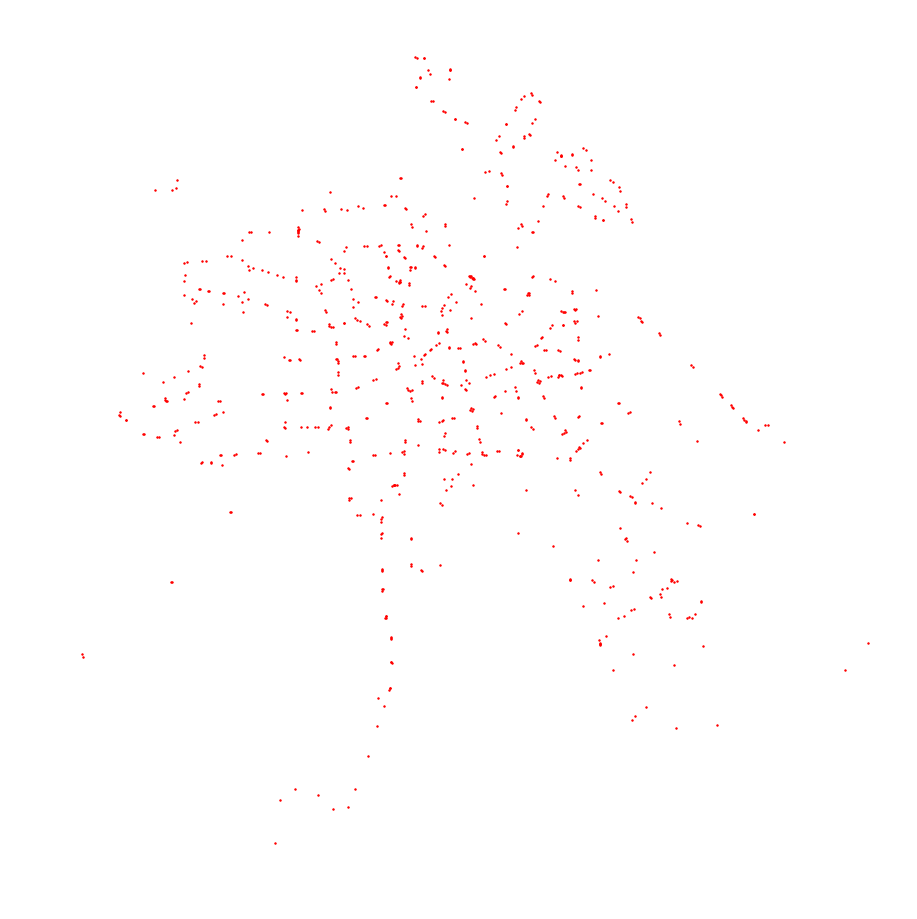

In [11]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos, node_size=2)
plt.show()

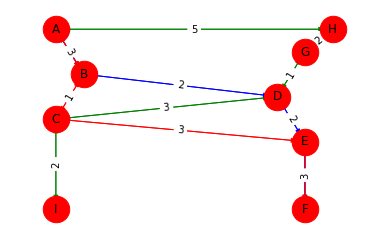

In [111]:
G=nx.MultiDiGraph()

# Lijn X
G.add_edges_from([("A","H",{"length":5}), ("H","A",{"length":5}), ("H","G",{"length":2}), ("G","H",{"length":2}), 
         ("G","D",{"length":1}), ("D","G",{"length":1}), ("C","I",{"length":2}), ("I","C",{"length":2}),
         ("D","C",{"length":3}), ("C","D",{"length":3})], line='X')

# Lijn Y
G.add_edges_from([("A","B",{"length":2}), ("B","A",{"length":2}), ("D","E",{"length":2}), ("E","D",{"length":2}),
         ("E","F",{"length":2}), ("F","E",{"length":2}), ("B","D",{"length":2}), ("D","B",{"length":2})], line='Y')
# Lijn Z
G.add_edges_from([("A","B",{"length":3}), ("B","A",{"length":3}), ("E","F",{"length":3}), ("F","E",{"length":3}),
         ("B","C",{"length":1}), ("C","B",{"length":1}), ("C","E",{"length":3}), ("E","C",{"length":3})], line='Z')


X = [(u, v) for (u, v, d) in G.edges(data=True) if d['line'] == 'X']
Y = [(u, v) for (u, v, d) in G.edges(data=True) if d['line'] == 'Y']
Z = [(u, v) for (u, v, d) in G.edges(data=True) if d['line'] == 'Z']

# Nodes
pos = {"A":(0, 10), "B":(1, 8), "C":(0, 6), "D":(8, 7), "E":(9, 5), "F":(9, 2),
       "G":(9, 9), "H":(10, 10), "I":(0, 2)}
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
nx.draw_networkx_edges(G, pos, edgelist=X, edge_color='green')
nx.draw_networkx_edges(G, pos, edgelist=Y, edge_color='blue')
nx.draw_networkx_edges(G, pos, edgelist=Z, edge_color='red')

# Labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

edge_labels = dict([((u, v), d['length']) for u, v, d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display
plt.axis('off')
plt.show()

In [113]:
# Routes: A-F, A-I, H-B, C-F
print("A-F:", nx.dijkstra_path(G,"A","F"))
print("A-I:", nx.dijkstra_path(G,"A","I"))
print("H-B:", nx.dijkstra_path(G,"H","B"))
print("C-F:", nx.dijkstra_path(G,"C","F"))

A-F: ['A', 'B', 'D', 'E', 'F']
A-I: ['A', 'B', 'C', 'I']
H-B: ['H', 'A', 'B']
C-F: ['C', 'E', 'F']
